In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc, confusion_matrix, roc_curve

from scipy import interp
from itertools import cycle

## Regression
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [5]:
Xs_r, y_r = datasets.make_regression(n_features=5,n_samples=1000,noise=0.6)
features_r = pd.DataFrame(Xs_r)
data_r = pd.concat([features_r,pd.DataFrame(y_r)],axis=1)
data_r.columns = ['A','B','C','D','E','Target']
X_train, X_test, y_train, y_test = train_test_split(features_r, y_r, test_size=0.25)

#### Parameters to Tune:

hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
The ith element represents the number of neurons in the ith hidden layer.

activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’
Activation function for the hidden layer.

‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
The solver for weight optimization.

‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
‘sgd’ refers to stochastic gradient descent.
‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

alpha : float, optional, default 0.0001
L2 penalty (regularization term) parameter.

#### The Problem:
MLPs take a long time. It is not feasible to figure out what the absolute best combination of predictors in when, for example if you settle on a HL = (300,300,300), activation=relu, alpha=0.03, you would need to test literally hundreds of millions of examples. Instead, we can consider different ideas as it comes to the design of the perceptron layout.

For example, we may wish to experiment with a set of: (S,S,S), (L,M,S), (L,S,L), ... as a way to emulate the many different indivdual values that the hidden layers can take.

In [13]:
#Create and Tune the Model on the Test Data
mlp = MLPRegressor(verbose=True,max_iter=1600)
mlp.fit(X_train,y_train)

Iteration 1, loss = 10470.39128285
Iteration 2, loss = 10458.02467585
Iteration 3, loss = 10446.32394928
Iteration 4, loss = 10433.96550034
Iteration 5, loss = 10421.86968180
Iteration 6, loss = 10409.22841021
Iteration 7, loss = 10396.17565421
Iteration 8, loss = 10382.62307154
Iteration 9, loss = 10368.72950283
Iteration 10, loss = 10354.17629019
Iteration 11, loss = 10339.11968892
Iteration 12, loss = 10322.58767735
Iteration 13, loss = 10306.28131204
Iteration 14, loss = 10288.21155521
Iteration 15, loss = 10269.31076909
Iteration 16, loss = 10249.67505129
Iteration 17, loss = 10229.35222191
Iteration 18, loss = 10206.59965688
Iteration 19, loss = 10183.47755409
Iteration 20, loss = 10159.17865502
Iteration 21, loss = 10133.63548547
Iteration 22, loss = 10106.42175610
Iteration 23, loss = 10078.75928728
Iteration 24, loss = 10048.89856950
Iteration 25, loss = 10017.59174145
Iteration 26, loss = 9985.16934847
Iteration 27, loss = 9951.94495379
Iteration 28, loss = 9916.27178751
Iter

Iteration 265, loss = 214.60217893
Iteration 266, loss = 213.23825440
Iteration 267, loss = 212.00760369
Iteration 268, loss = 210.71945935
Iteration 269, loss = 209.46647662
Iteration 270, loss = 208.24710217
Iteration 271, loss = 207.07925867
Iteration 272, loss = 205.95414811
Iteration 273, loss = 204.92494638
Iteration 274, loss = 203.80488521
Iteration 275, loss = 202.76887325
Iteration 276, loss = 201.85753997
Iteration 277, loss = 200.84609550
Iteration 278, loss = 199.87085948
Iteration 279, loss = 198.98819721
Iteration 280, loss = 198.07488499
Iteration 281, loss = 197.21291569
Iteration 282, loss = 196.37412155
Iteration 283, loss = 195.54274083
Iteration 284, loss = 194.78146621
Iteration 285, loss = 193.91882560
Iteration 286, loss = 193.15522771
Iteration 287, loss = 192.40417166
Iteration 288, loss = 191.70035809
Iteration 289, loss = 190.98068163
Iteration 290, loss = 190.25875459
Iteration 291, loss = 189.59976689
Iteration 292, loss = 188.91890643
Iteration 293, loss 

Iteration 505, loss = 116.41356315
Iteration 506, loss = 116.09858750
Iteration 507, loss = 115.79013201
Iteration 508, loss = 115.48380635
Iteration 509, loss = 115.16312678
Iteration 510, loss = 114.85737428
Iteration 511, loss = 114.54407906
Iteration 512, loss = 114.22824483
Iteration 513, loss = 113.93720216
Iteration 514, loss = 113.61609236
Iteration 515, loss = 113.32469829
Iteration 516, loss = 112.99490947
Iteration 517, loss = 112.68949272
Iteration 518, loss = 112.37767071
Iteration 519, loss = 112.07586623
Iteration 520, loss = 111.75936336
Iteration 521, loss = 111.45806319
Iteration 522, loss = 111.14132092
Iteration 523, loss = 110.82283402
Iteration 524, loss = 110.52123037
Iteration 525, loss = 110.21162385
Iteration 526, loss = 109.90219266
Iteration 527, loss = 109.58200403
Iteration 528, loss = 109.28789565
Iteration 529, loss = 108.97047329
Iteration 530, loss = 108.64841395
Iteration 531, loss = 108.34912054
Iteration 532, loss = 108.03461726
Iteration 533, loss 

Iteration 802, loss = 37.57788635
Iteration 803, loss = 37.38286254
Iteration 804, loss = 37.19289072
Iteration 805, loss = 37.01604378
Iteration 806, loss = 36.81690579
Iteration 807, loss = 36.62691822
Iteration 808, loss = 36.43597793
Iteration 809, loss = 36.25063253
Iteration 810, loss = 36.06499179
Iteration 811, loss = 35.87729199
Iteration 812, loss = 35.68875913
Iteration 813, loss = 35.51397601
Iteration 814, loss = 35.32145798
Iteration 815, loss = 35.13791566
Iteration 816, loss = 34.95468204
Iteration 817, loss = 34.77040633
Iteration 818, loss = 34.60170056
Iteration 819, loss = 34.40848758
Iteration 820, loss = 34.22873880
Iteration 821, loss = 34.04719869
Iteration 822, loss = 33.86629356
Iteration 823, loss = 33.69493681
Iteration 824, loss = 33.51510339
Iteration 825, loss = 33.33416227
Iteration 826, loss = 33.15891870
Iteration 827, loss = 32.99081383
Iteration 828, loss = 32.81256383
Iteration 829, loss = 32.63056137
Iteration 830, loss = 32.46262530
Iteration 831,

Iteration 1087, loss = 6.97089141
Iteration 1088, loss = 6.93036261
Iteration 1089, loss = 6.89166664
Iteration 1090, loss = 6.85310194
Iteration 1091, loss = 6.81218080
Iteration 1092, loss = 6.77268281
Iteration 1093, loss = 6.73514028
Iteration 1094, loss = 6.69649743
Iteration 1095, loss = 6.65846482
Iteration 1096, loss = 6.62585714
Iteration 1097, loss = 6.58267746
Iteration 1098, loss = 6.54409901
Iteration 1099, loss = 6.50656058
Iteration 1100, loss = 6.47070629
Iteration 1101, loss = 6.43540469
Iteration 1102, loss = 6.40149372
Iteration 1103, loss = 6.36267686
Iteration 1104, loss = 6.32726633
Iteration 1105, loss = 6.29262434
Iteration 1106, loss = 6.25765736
Iteration 1107, loss = 6.22212542
Iteration 1108, loss = 6.18817171
Iteration 1109, loss = 6.15271322
Iteration 1110, loss = 6.12020458
Iteration 1111, loss = 6.08648938
Iteration 1112, loss = 6.05076336
Iteration 1113, loss = 6.01877673
Iteration 1114, loss = 5.98534043
Iteration 1115, loss = 5.95332778
Iteration 1116

Iteration 1369, loss = 2.04619455
Iteration 1370, loss = 2.03964449
Iteration 1371, loss = 2.03330121
Iteration 1372, loss = 2.02578307
Iteration 1373, loss = 2.01997770
Iteration 1374, loss = 2.01260179
Iteration 1375, loss = 2.00621669
Iteration 1376, loss = 2.00040466
Iteration 1377, loss = 1.99395329
Iteration 1378, loss = 1.98680250
Iteration 1379, loss = 1.98023197
Iteration 1380, loss = 1.97367623
Iteration 1381, loss = 1.96780728
Iteration 1382, loss = 1.96086047
Iteration 1383, loss = 1.95420956
Iteration 1384, loss = 1.94863002
Iteration 1385, loss = 1.94255471
Iteration 1386, loss = 1.93589764
Iteration 1387, loss = 1.92975951
Iteration 1388, loss = 1.92299275
Iteration 1389, loss = 1.91684096
Iteration 1390, loss = 1.91160800
Iteration 1391, loss = 1.90439256
Iteration 1392, loss = 1.89868609
Iteration 1393, loss = 1.89261740
Iteration 1394, loss = 1.88642066
Iteration 1395, loss = 1.88044446
Iteration 1396, loss = 1.87518980
Iteration 1397, loss = 1.86865709
Iteration 1398

/Users/jacobswe/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1600, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [14]:
#Test the Model
print(mlp.score(X_test,y_test))

0.9998486180202135


## Classification
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [17]:
Xs,y = datasets.make_classification(n_features=15,n_samples=5000,n_classes=4,n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)

Parameter Tuning will remain the same as it comes to values.

In [21]:
#Create and Tune the Model on the Test Data
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50),activation='relu',verbose=True)
mlp.fit(X_train,y_train)

Iteration 1, loss = 1.25849785
Iteration 2, loss = 0.91758945
Iteration 3, loss = 0.68764076
Iteration 4, loss = 0.59033322
Iteration 5, loss = 0.53729629
Iteration 6, loss = 0.50587254
Iteration 7, loss = 0.47921272
Iteration 8, loss = 0.45765125
Iteration 9, loss = 0.44036405
Iteration 10, loss = 0.41926579
Iteration 11, loss = 0.40423885
Iteration 12, loss = 0.38709675
Iteration 13, loss = 0.37283155
Iteration 14, loss = 0.35592306
Iteration 15, loss = 0.34570127
Iteration 16, loss = 0.33693955
Iteration 17, loss = 0.32502860
Iteration 18, loss = 0.31236397
Iteration 19, loss = 0.30076491
Iteration 20, loss = 0.29403801
Iteration 21, loss = 0.28536460
Iteration 22, loss = 0.27958810
Iteration 23, loss = 0.27500857
Iteration 24, loss = 0.26473632
Iteration 25, loss = 0.26021609
Iteration 26, loss = 0.25347711
Iteration 27, loss = 0.24722084
Iteration 28, loss = 0.24245709
Iteration 29, loss = 0.23816066
Iteration 30, loss = 0.23081855
Iteration 31, loss = 0.22598867
Iteration 32, los

/Users/jacobswe/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [22]:
#Test the Model
print(mlp.score(X_test,y_test))

0.879


## Evaluating Success for Classification
ROC Curves

In [23]:
#Binarize
target_b = label_binarize(y, classes=[0,1,2,3])
n_classes = target_b.shape[1]

#Split
X_train, X_test, y_train, y_test = train_test_split(Xs, target_b, test_size=0.25)
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

#Score
y_scores = mlp.predict_proba(X_test)

# Compute ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_scores[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

/Users/jacobswe/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


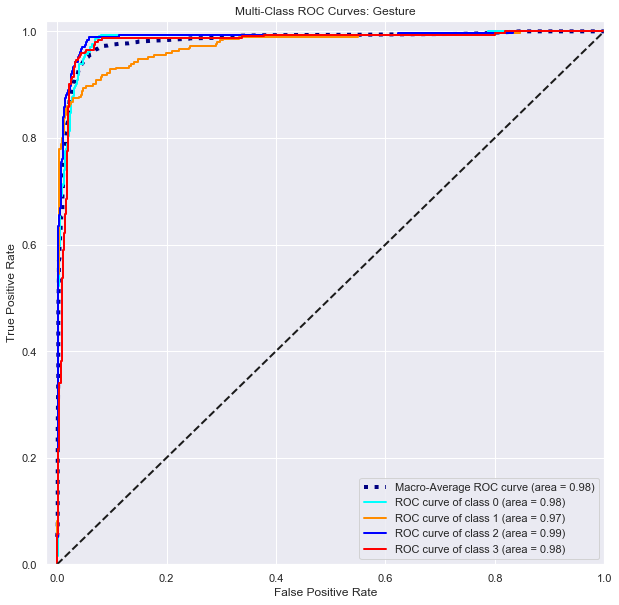

In [24]:
# Aggregate False Positive Rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate Curves
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,10))

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-Average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'blue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curves: Gesture')
plt.legend(loc="lower right")

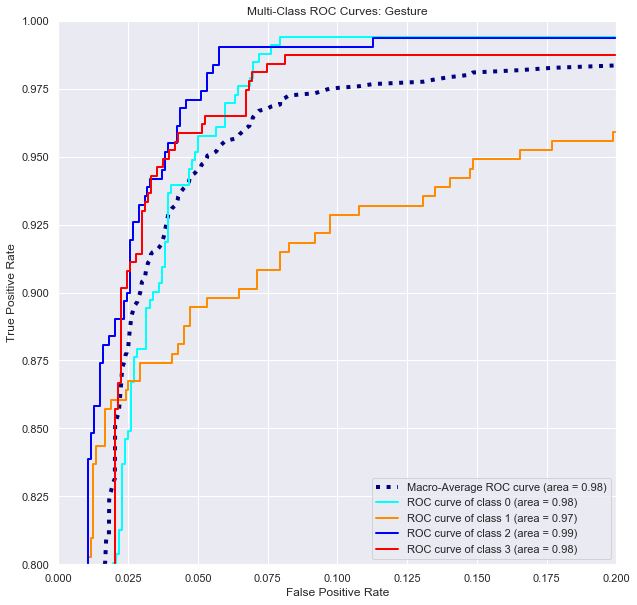

In [25]:
# Plot all ROC curves
plt.figure(figsize=(10,10))

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-Average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'blue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([ 0, .2])
plt.ylim([0.8, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curves: Gesture')
plt.legend(loc="lower right")

Confusion Matrices

/Users/jacobswe/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1.0, 'Confusion Matrix')]

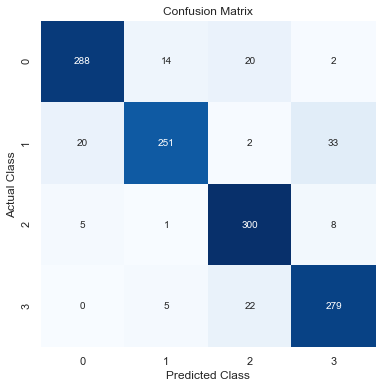

In [26]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25)
mlp.fit(X_train,np.ravel(y_train))

test_cf = pd.DataFrame(confusion_matrix(y_test,mlp.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1.0, 'Normalized Confusion Matrix')]

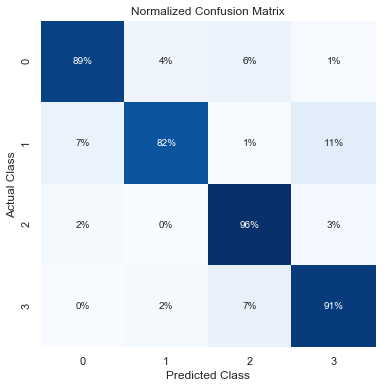

In [27]:
test_cf = confusion_matrix(y_test,mlp.predict(X_test))
test_cf = test_cf.astype('float') / test_cf.sum(axis=1)[:, np.newaxis]
test_cf = pd.DataFrame((test_cf))
                           
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,cmap='Blues',cbar=False,fmt='.0%')
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Normalized Confusion Matrix')